In [73]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [74]:
#11:00-2:00
col_names=['_messagetimems','_messagetime','_raw', 'cid', 'classname','collector','configname']
df = pd.read_csv('etsy29.csv', skipinitialspace=True)

In [75]:
# remove non-important columns
#Remove info and Warning logs
# reverse the data set to get the logs at the end is when the outage occured

df.rename(columns=lambda x: x.strip())
df=df.drop(columns=['cid','_messagetime','rh','_raw','_size','_source','_sourcecategory','_collector','_sourcename','userid'])
df=df[df.loglevel != 'INFO  ']
df=df[df.loglevel != 'WARN  ']
val = df['_messagetimems'].iloc[0]
df=df.iloc[::-1]

In [49]:
print(df.head())
print('----------------------------------------------------------')
print(df.info())

       _messagetimems                           classname configname loglevel  \
99267   1593104646972  lithium.util.db.LithiumDataSource   etsy.prod   ERROR    
99166   1593104648790  tionServiceNotificationManagerImpl  etsy.prod   ERROR    
98975   1593104656972  lithium.util.db.LithiumDataSource   etsy.prod   ERROR    
98963   1593104660606  org.apache.tapestry5.ioc.Registry   etsy.prod   ERROR    
98962   1593104660606  org.apache.tapestry5.ioc.Registry   etsy.prod   ERROR    

                     _sourcehost  \
99267  sjc1papp24.sj.lithium.com   
99166  sjc1papp24.sj.lithium.com   
98975  sjc1papp24.sj.lithium.com   
98963  sjc1papp24.sj.lithium.com   
98962  sjc1papp24.sj.lithium.com   

                                                    text      thread  \
99267               Failed to read address of DB cluster  3-thread-3   
99166  [38ADB2BB] error: Tried to send an e-mail to a...  ontainer-2   
98975               Failed to read address of DB cluster  3-thread-3   
98963   

In [50]:
df.loglevel.unique() 

array(['ERROR '], dtype=object)

In [51]:
# To find the time gap between 2 errors
# to find the range when the first error came till the time outage was fixed
df['timedifferenceBw2']=df['_messagetimems'].diff(1)
df['timeToOutage']=val-df['_messagetimems']

In [52]:
print(df.head())

       _messagetimems                           classname configname loglevel  \
99267   1593104646972  lithium.util.db.LithiumDataSource   etsy.prod   ERROR    
99166   1593104648790  tionServiceNotificationManagerImpl  etsy.prod   ERROR    
98975   1593104656972  lithium.util.db.LithiumDataSource   etsy.prod   ERROR    
98963   1593104660606  org.apache.tapestry5.ioc.Registry   etsy.prod   ERROR    
98962   1593104660606  org.apache.tapestry5.ioc.Registry   etsy.prod   ERROR    

                     _sourcehost  \
99267  sjc1papp24.sj.lithium.com   
99166  sjc1papp24.sj.lithium.com   
98975  sjc1papp24.sj.lithium.com   
98963  sjc1papp24.sj.lithium.com   
98962  sjc1papp24.sj.lithium.com   

                                                    text      thread  \
99267               Failed to read address of DB cluster  3-thread-3   
99166  [38ADB2BB] error: Tried to send an e-mail to a...  ontainer-2   
98975               Failed to read address of DB cluster  3-thread-3   
98963   

In [53]:
#df['timeToOutage']

In [54]:
#df['_messagetime'].str.replace('\W', ' ')

In [55]:
#all possible errors seen in the system
df.classname.unique() 

array(['lithium.util.db.LithiumDataSource ',
       'tionServiceNotificationManagerImpl',
       'org.apache.tapestry5.ioc.Registry ',
       'ibutedCacheManagerWithRedisCluster',
       'freemarker.runtime                ',
       'forums.web.v4.pages.ForumTopicPage',
       'ices.forms.CodebookFormSupportImpl',
       'lithium.mail.MailManager          ',
       'CUSTOM_CONTEXT:common_functions   ',
       'ium.user.sql.MySQLUserManagerStats',
       'ards.core.events.MessageDispatcher',
       '.servlet.session.UserSessionFilter',
       'boards.servlet.BaseCommunityFilter',
       'iaRequestExceptionHandlerDecorator',
       'notifications.StandardToastSupport',
       'es.actions.ActionRunnerServiceImpl',
       'etrics.UserPostMetricHackDecorator',
       'ium.feed.NewsFeedManagerHelperImpl',
       'lithium.boards.audit.SqlAuditEvent',
       'ium.boards.audit.AuditEventManager'], dtype=object)

In [56]:
# get the columns error and host ip on which error occured. As the logs are fetched on more then one app servers
df1=df[['classname','_sourcehost','_messagetimems']]

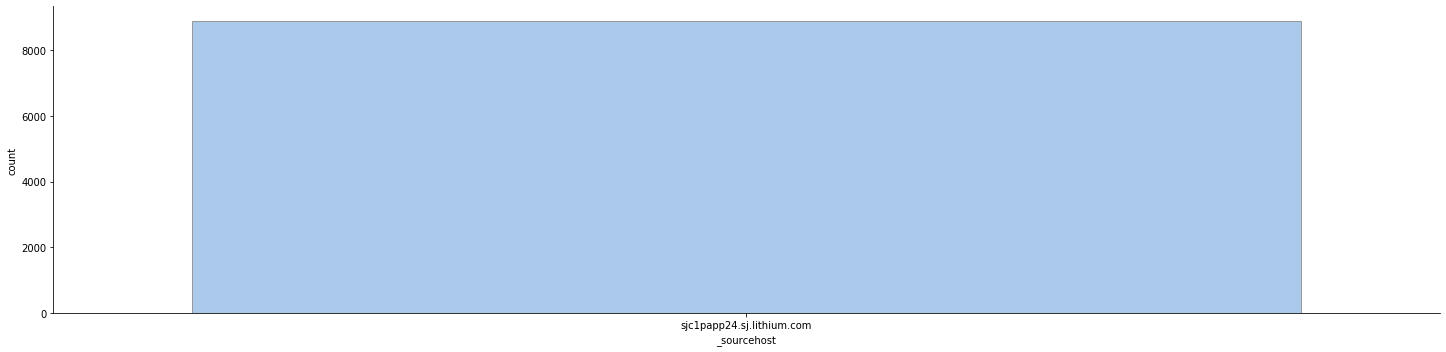

In [57]:
#sns.catplot(bins=100,figsize = (15,20),orientation='horizontal',yrot=90)
#distribution of errors on different app servers
sn.catplot(x="_sourcehost", kind="count",palette="pastel", edgecolor=".6",data=df1,height=5,aspect=4,orient='h')

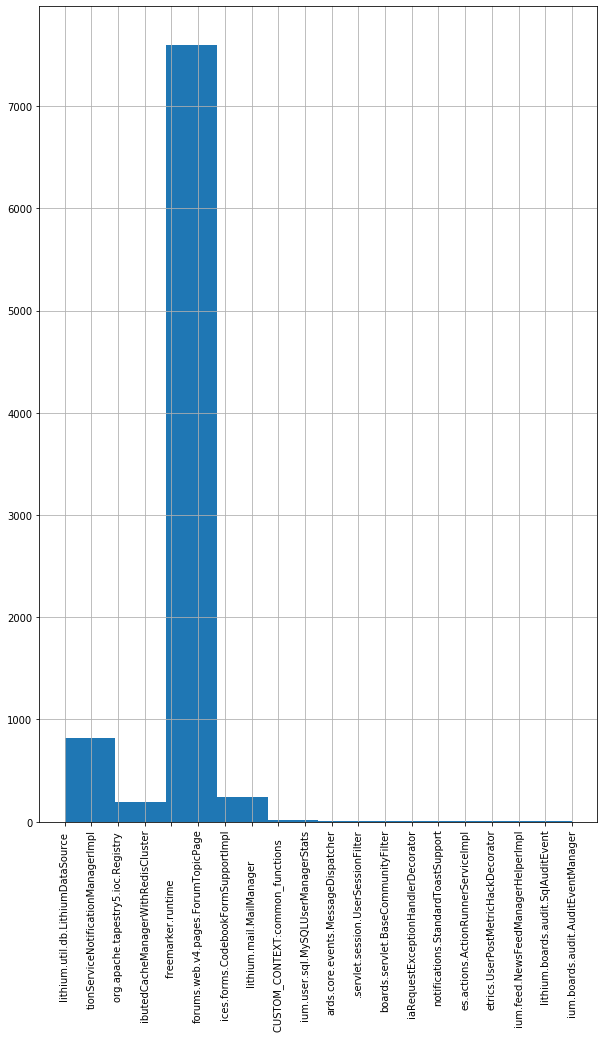

In [58]:
#Fetch the most common errors to plot final distribution
df1['classname'].hist(figsize = (10,15),xrot=90)

<Figure size 2880x1440 with 0 Axes>

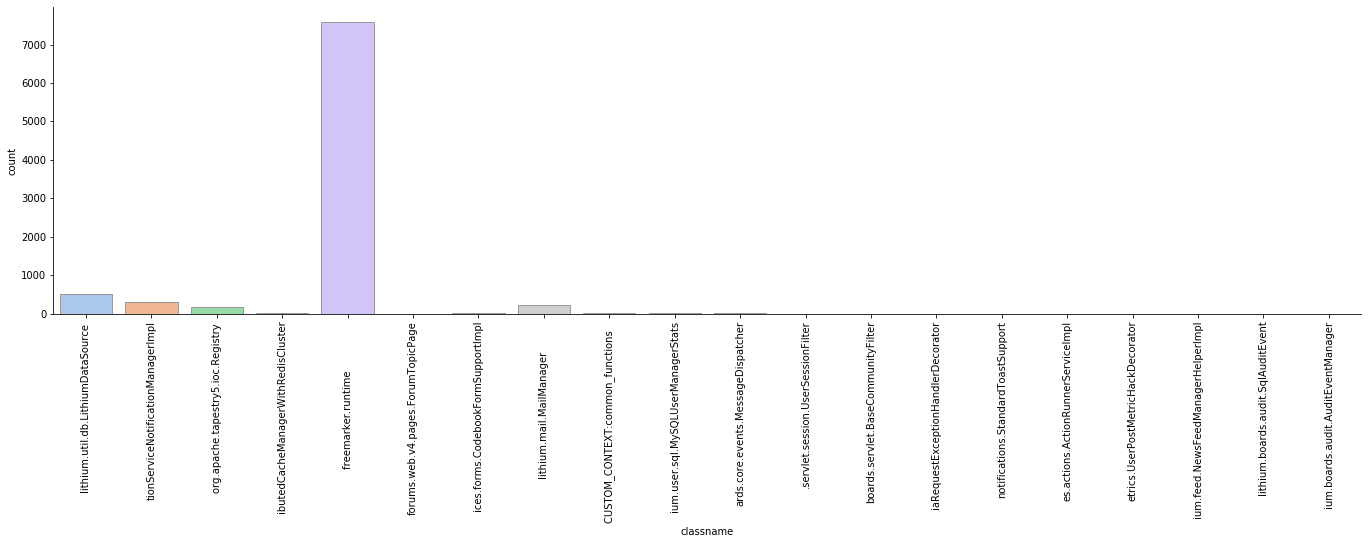

In [59]:
plt.figure(figsize=(40,20))
chart = sn.catplot(x="classname", kind="count",palette="pastel", edgecolor=".6",data=df1,height=5,aspect=4);
chart.set_xticklabels(rotation=90)

In [60]:
#Fetch the most common errors to plot final distribution
df2=df1[(df1.classname == 'freemarker.runtime                ') | (df1.classname == 'iaRequestExceptionHandlerDecorator')]

In [61]:
#df6.count()
#hist = df1.hist(x="classname",figsize = (15,20),orientation='vertical',xrot=45)

In [62]:
#Get only the freemarker error distribution to try to search for a pattern
df3=df2[df2.classname == 'freemarker.runtime                ']
df3

,classname,_sourcehost,_messagetimems
98954,freemarker.runtime,sjc1papp24.sj.lithium.com,1593104671936
98953,freemarker.runtime,sjc1papp24.sj.lithium.com,1593104671972
98952,freemarker.runtime,sjc1papp24.sj.lithium.com,1593104672019
98951,freemarker.runtime,sjc1papp24.sj.lithium.com,1593104672058
98950,freemarker.runtime,sjc1papp24.sj.lithium.com,1593104672097
...,...,...,...
19,freemarker.runtime,sjc1papp24.sj.lithium.com,1593109788082
18,freemarker.runtime,sjc1papp24.sj.lithium.com,1593109788116
17,freemarker.runtime,sjc1papp24.sj.lithium.com,1593109788149
16,freemarker.runtime,sjc1papp24.sj.lithium.com,1593109788181


In [63]:
df3=df3['_messagetimems']

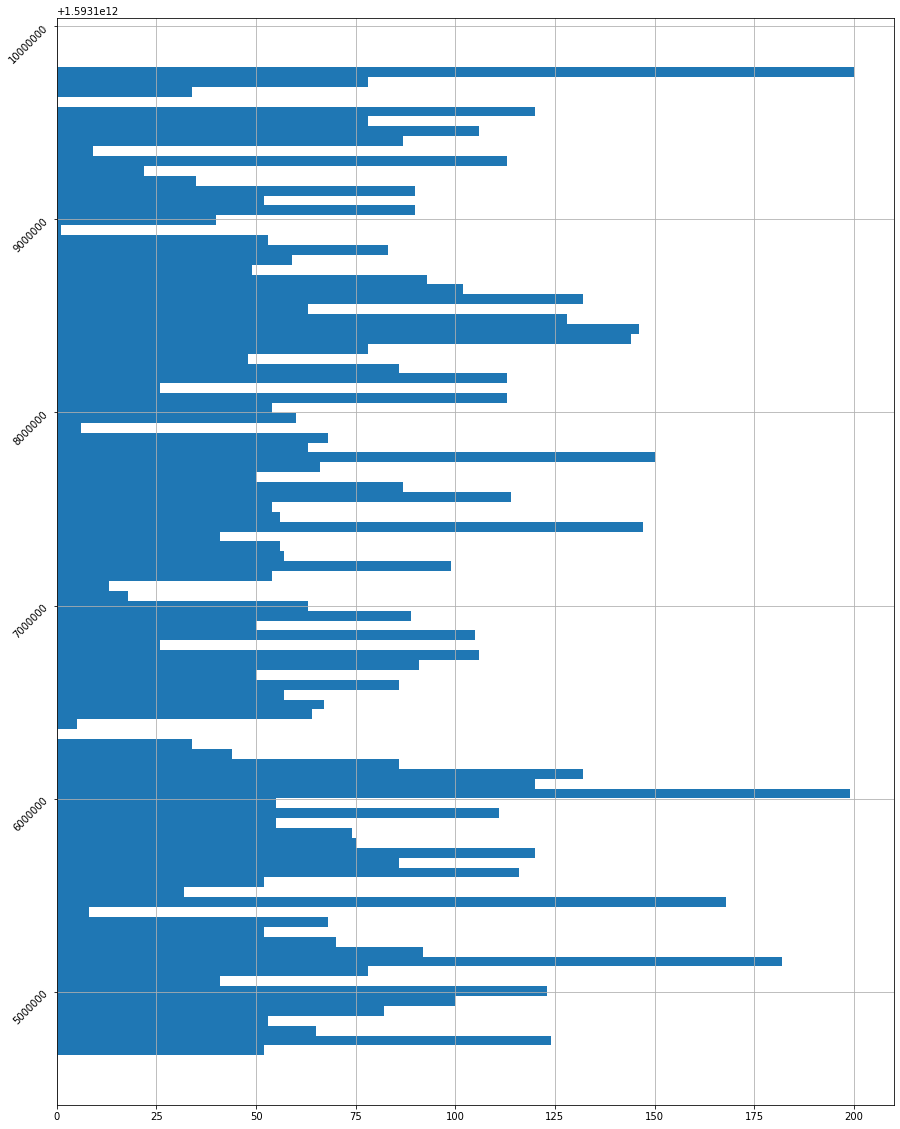

In [64]:
# try and plot the distribution of error with time
df3.hist(bins=100,figsize = (15,20),orientation='horizontal',yrot=45)

In [72]:
# plt.figure(figsize=(40,20))
# chart = sn.catplot(y="_messagetimems", kind="count",palette="pastel", edgecolor=".6",data=df1,height=5,aspect=4);
# chart.set_xticklabels(rotation=90)

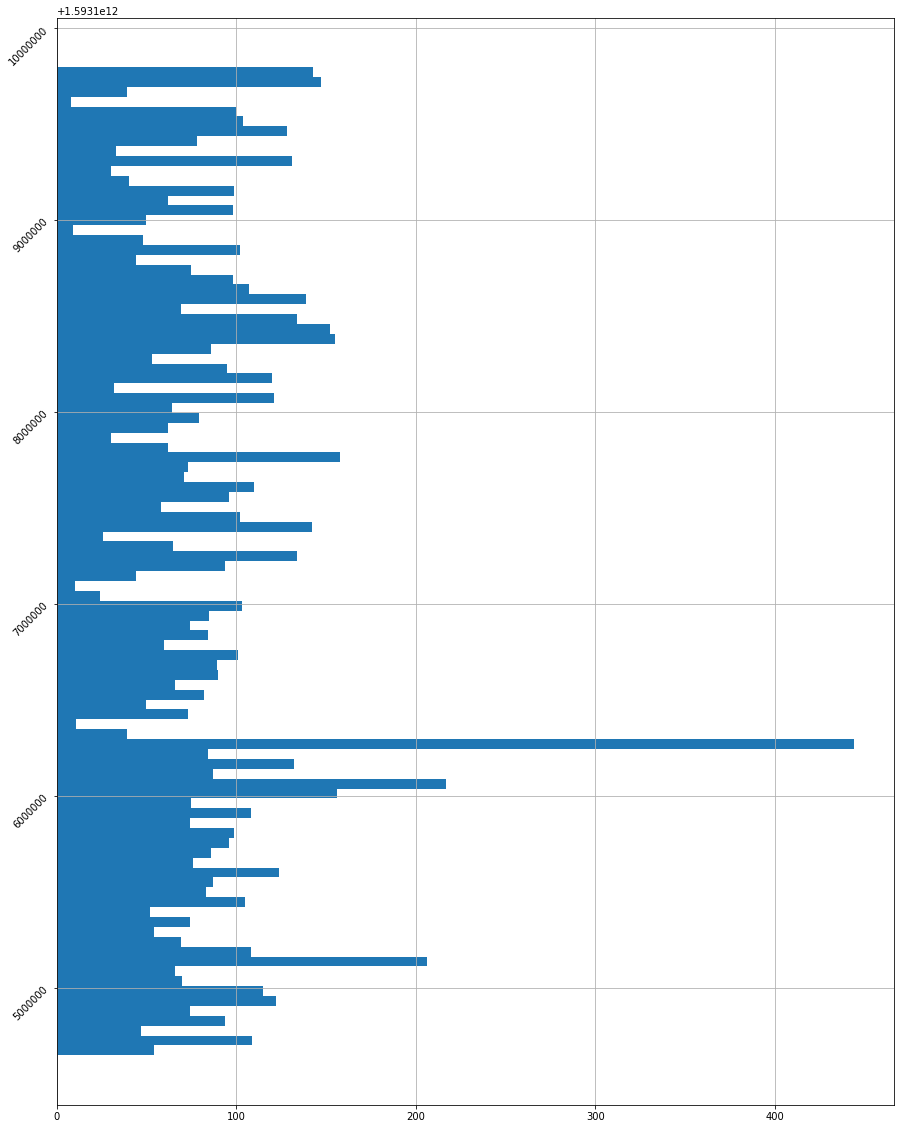

In [71]:
#Plot all errors
df1['_messagetimems'].hist(bins=100,figsize = (15,20),orientation='horizontal',yrot=45)